<a href="https://colab.research.google.com/github/chisomobanja/metadata-classification/blob/main/metadata_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business Understanding

## 1.1 Problem statement
Many articles published in UNZA journals have incomplete or inconsistent descriptive metadata (e.g., missing author names, publication dates, keywords, abstracts). This makes it difficult for researchers or librarians to correctly cite articles. We need a way to automatically classify the completeness of metadata associated with each article, so we can identify gaps and improve metadata quality.

##1.2 Business Objectives


 1. Automate Metadata Completeness Classification.

 2. Diagnose Metadata Gaps Across UNZA journels.

 3. improve Citation Accuracy and Research Discoverability.

 4. Standaridise Metadata Practices.

 5. Establish Sustainable Metadata Governance.


### 1.2.1 What success might look like in real life :

  - Metadata Completeness where each article recieves a scored ranging from 0% to 100% based on the presence of key metadata.

  - Reduction in Incomplete Records where number of articles with missing metadata drops by a good percentage like 70%.


- Improved Citation Quality where there is a great reduction in citation errors by researchers and librarians.

- Metadata validation reduces manual correction workload by a great percentage.

- Metadata audits and contributor training are institutionalised in various departments.

## 1.3 Translating business objectives into data mining goals
To achieve the above business objectives, our project will focus on developing a robust classification model capable of automatically evaluating the completeness of descriptive metadata for articles in UNZA journals. Specifically:
- Build a supervised classification model that categorizes articles into defined completeness levels — for example:

  -Complete (all required metadata fields present),

  -Partially Complete (some key fields missing),

  -Incomplete (major fields missing).
- Train and validate the model using historical article metadata records, where completeness has been manually assessed, ensuring the model can generalize to new, unseen records.
- Leverage appropriate features from metadata fields such as title, author(s), publication date, keywords, abstract, DOI, and journal name to determine the completeness score/class.
- Enable metadata quality insights by aggregating classification results to identify common gaps across journals, which will guide targeted improvements and policy enforcement.
- Set measurable model performance targets — e.g., at least 85% classification accuracy for predicting completeness categories on test data.

## 1.4 Initial Project Success Criteria
We’ll know our project is successful when we can clearly see improvements in both the quality of metadata and the ease of managing it. Specifically:

1. ### Accurate classifications
   Our model should correctly predict whether an article’s metadata is complete, partially complete, or incomplete at least 85% of the time. It should also be especially reliable in spotting incomplete records, with precision and recall above 80%.

2. ### Trustworthy completeness scores
   When we compare the system’s completeness scores to manual librarian checks, the difference should be very small ideally less than 5%.

3. ### Noticeable improvement in records  
   Within a period of time, the number of articles with missing or incomplete metadata should drop by at least half in the journals we focus on.

4. ### Smooth workflow integration  
   The tool should fit into the existing UNZA journal processes without slowing things down, allowing continuous checks without extra hassle.

5. ### Positive user feedback  
   Librarians, editors, and contributors should find the tool easy to use and report that it saves them time and reduces the amount of manual fixing they have to do.


##1.5 Next Steps

To move forward, we will begin by collecting and preparing metadata samples from existing UNZA journal articles. This includes labelling records for completeness and identifying key metadata fields. We will then design and test initial classification models, refining them based on performance metrics. Parallel to model development, we’ll engage stakeholders (librarians, editors, contributors) to ensure the solution aligns with their workflows and needs. Once validated, the tool will be piloted on select journals before broader deployment.

# 2. Data Understanding


In [ ]:
# Installing gdown to directly use a link
!pip install -q gdown
# I used -q gdown because the direct google drive was only working on my end but not woth other users.
# Each user would have had to put the dataset in a specific folder on their drive, so I opted to use a direct link to the file on google drive
import gdown
import pandas as pd

# File ID from the shared link
file_id = "1sErHRwqKS2O4wby5ocsrp2g4isWTGfzM"
url = f"https://drive.google.com/uc?id={file_id}"

#This downloads the csv to local storage
output = "db-unza25-csc4792-datasets-dspace_unza_zm.csv"
gdown.download(url, output, quiet=False)

# This reads the csv and assigns it to df
df = pd.read_csv(output, delimiter="|", engine="python")

Downloading...
From: https://drive.google.com/uc?id=1sErHRwqKS2O4wby5ocsrp2g4isWTGfzM
To: /content/db-unza25-csc4792-datasets-dspace_unza_zm.csv
100%|██████████| 4.75M/4.75M [00:00<00:00, 117MB/s]


Found it hard to directly acess the shared folder so I had to use a direct link to the folder and then access that. Used the | delimeter because that's what was used in the csv file.

##Below are the explorative operations on the data

In [ ]:
df.head(3)

,_identifier,_datestamp,_setSpec,title,creator,subject,description,date,type,identifier,language,format
0,oai:dspace.unza.zm:123456789/4153,2016-06-09T12:46:34Z,com_123456789_289=col_123456789_290,Morphological characterisation of low and high...,"Chinyundo, Anthony",Helianthus Annuus. L.=Sun flower oil=Cooking oil,Morphological characterization was done on thr...,2015-11-11T13:39:13Z=2015-11-11T13:39:13Z=2015...,Other,http://hdl.handle.net/123456789/4153,en,application/pdf
1,oai:dspace.unza.zm:123456789/3777,2016-06-09T10:16:03Z,com_123456789_18=col_123456789_76,Instruction based formative assessment in sele...,"Mwale, Fred M.",Educational tests and measurement=Formative As...,The purpose of the study was to evaluate the u...,2015-04-13T07:36:13Z=2015-04-13T07:36:13Z=2015...,Thesis,http://hdl.handle.net/123456789/3777,en,application/pdf=application/pdf=application/pd...
2,oai:dspace.unza.zm:123456789/4729,2017-07-26T01:01:14Z,com_123456789_18=col_123456789_76,An assessment of teachers' competences in care...,"Banda, Christopher","Counselling in Secondary Education-Solwezi, Za...",M.ED=The purpose of the study was to assess th...,2017-07-25T13:51:51Z=2017-07-25T13:51:51Z=2016,Thesis,http://dspace.unza.zm:8080/xmlui/handle/123456...,en,application/pdf


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1-BTiEnn1t-F08oXibg3YXsMsQsnyZYhfzeqBANLDUmE/edit#gid=0


In [ ]:
df.tail(4)

,_identifier,_datestamp,_setSpec,title,creator,subject,description,date,type,identifier,language,format
1996,oai:dspace.unza.zm:123456789/315,2016-06-09T10:33:03Z,com_123456789_18=col_123456789_76,Classroom and play ground interaction of child...,"Banda, Grace Nosta",Mental retardation facilities -- George Basic ...,The aim of the present study was to investigat...,2011-04-11T14:07:41Z=2011-04-11T14:07:41Z=2011...,Thesis,http://hdl.handle.net/123456789/315,en,application/pdf
1997,oai:dspace.unza.zm:123456789/1038,2016-06-09T11:11:49Z,com_123456789_18=col_123456789_99,Exploring information seeking behaviour of use...,"Kamyalile, Simuchimba",information services(banking)--Zambia=Business...,Developments in the information technology sec...,2012-01-20T09:59:15Z=2012-01-20T09:59:15Z=2012...,Thesis,http://hdl.handle.net/123456789/1038,en,application/pdf
1998,oai:dspace.unza.zm:123456789/5506,2018-12-18T12:24:40Z,com_123456789_1=col_123456789_6,The information needs and information seeking ...,"Mulauzi, Felesia=Gwai, Sara=Hamooya, Chrispin",Braille=Information seeking behavior=Informati...,This study was carried out to examine the info...,2018-12-18T12:24:31Z=2018-12-18T12:24:31Z=2012-05,Article,http://dspace.unza.zm:8080/xmlui/handle/123456...,en,application/pdf
1999,oai:dspace.unza.zm:123456789/3600,2016-06-09T12:44:51Z,com_123456789_289=col_123456789_294,The Law of Defarmation and Freedom of the Pres...,"Chalwa, Peter Halwele Rhonex",Libel and Slander-Zambia=Freedom of the press-...,NaN,2015-01-29T08:14:32Z=2015-01-29T08:14:32Z=2015...,Other,http://hdl.handle.net/123456789/3600,en,application/pdf=application/pdf


In [ ]:
df.columns

Index(['_identifier', '_datestamp', '_setSpec', 'title', 'creator', 'subject',
       'description', 'date', 'type', 'identifier', 'language', 'format'],
      dtype='object')

In [ ]:
df.shape

(2000, 12)

In [ ]:
df.index

RangeIndex(start=0, stop=2000, step=1)

In [ ]:
df.dtypes

,0
_identifier,object
_datestamp,object
_setSpec,object
title,object
creator,object
subject,object
description,object
date,object
type,object
identifier,object


In [ ]:
df.describe

<bound method NDFrame.describe of                             _identifier            _datestamp  \
0     oai:dspace.unza.zm:123456789/4153  2016-06-09T12:46:34Z   
1     oai:dspace.unza.zm:123456789/3777  2016-06-09T10:16:03Z   
2     oai:dspace.unza.zm:123456789/4729  2017-07-26T01:01:14Z   
3     oai:dspace.unza.zm:123456789/3233  2016-06-09T13:19:00Z   
4     oai:dspace.unza.zm:123456789/3314  2016-06-09T12:15:44Z   
...                                 ...                   ...   
1995  oai:dspace.unza.zm:123456789/3859  2016-06-09T13:10:00Z   
1996   oai:dspace.unza.zm:123456789/315  2016-06-09T10:33:03Z   
1997  oai:dspace.unza.zm:123456789/1038  2016-06-09T11:11:49Z   
1998  oai:dspace.unza.zm:123456789/5506  2018-12-18T12:24:40Z   
1999  oai:dspace.unza.zm:123456789/3600  2016-06-09T12:44:51Z   

                                   _setSpec  \
0       com_123456789_289=col_123456789_290   
1         com_123456789_18=col_123456789_76   
2         com_123456789_18=col_123456789_76   
3         com_123456789_18=col_123456789_76   
4     com_123456789_1093=col_123456789_1106   
...                                     ...   
1995      com_123456789_18=col_123456789_76   
1996      com_123456789_18=col_123456789_76   
1997      com_123456789_18=col_123456789_99   
1998        com_123456789_1=col_123456789_6   
1999    com_123456789_289=col_123456789_294   

                                                  title  \
0     Morphological characterisation of low and high...   
1     Instruction based formative assessment in sele...   
2     An assessment of teachers' competences in care...   
3     The status of guidance and counselling provisi...   
4                            Library Studies Exams 2008   
...                                                 ...   
1995  An analysis of the contributions of the Holy C...   
1996  Classroom and play ground interaction of child...   
1997  Exploring information seeking behaviour of use...   
1998  The information needs and information seeking ...   
1999  The Law of Defarmation and Freedom of the Pres...   

                                            creator  \
0                                Chinyundo, Anthony   
1                                    Mwale, Fred M.   
2                                Banda, Christopher   
3                           Makumba, Chivuna Edward   
4                              University of Zambia   
...                                             ...   
1995                    Ilubala-Ziwa, Lubasi Judith   
1996                             Banda, Grace Nosta   
1997                          Kamyalile, Simuchimba   
1998  Mulauzi, Felesia=Gwai, Sara=Hamooya, Chrispin   
1999                   Chalwa, Peter Halwele Rhonex   

                                                subject  \
0      Helianthus Annuus. L.=Sun flower oil=Cooking oil   
1     Educational tests and measurement=Formative As...   
2     Counselling in Secondary Education-Solwezi, Za...   
3     Educational Counselling-Mumbwa, Zambia=Guidanc...   
4     Library and information studies=2008=Second Se...   
...                                                 ...   
1995  Church Work-Zambia=Women Education-Zambia=Wome...   
1996  Mental retardation facilities -- George Basic ...   
1997  information services(banking)--Zambia=Business...   
1998  Braille=Information seeking behavior=Informati...   
1999  Libel and Slander-Zambia=Freedom of the press-...   

                                            description  \
0     Morphological characterization was done on thr...   
1     The purpose of the study was to evaluate the u...   
2     M.ED=The purpose of the study was to assess th...   
3     The purpose of the study was to investigate th...   
4     Past Exams for the department of Library and i...   
...                                                 ...   
1995  The purpose of the study was to analyse the co...   
1996  The aim of the present study was to investigat...   
1997  Deve

In [ ]:
df.isnull().sum()

,0
_identifier,0
_datestamp,0
_setSpec,0
title,15
creator,24
subject,32
description,221
date,15
type,26
identifier,15


In [ ]:
df.isnull().mean()*100

,0
_identifier,0.00
_datestamp,0.00
_setSpec,0.00
title,0.75
creator,1.20
subject,1.60
description,11.05
date,0.75
type,1.30
identifier,0.75


In [ ]:
df.notnull()

,_identifier,_datestamp,_setSpec,title,creator,subject,description,date,type,identifier,language,format
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,True,True,True,True,True,True,True,True,True,True,True,True
1996,True,True,True,True,True,True,True,True,True,True,True,True
1997,True,True,True,True,True,True,True,True,True,True,True,True
1998,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
df.notnull().sum()

,0
_identifier,2000
_datestamp,2000
_setSpec,2000
title,1985
creator,1976
subject,1968
description,1779
date,1985
type,1974
identifier,1985


In [ ]:
df.dropna

<bound method DataFrame.dropna of                             _identifier            _datestamp  \
0     oai:dspace.unza.zm:123456789/4153  2016-06-09T12:46:34Z   
1     oai:dspace.unza.zm:123456789/3777  2016-06-09T10:16:03Z   
2     oai:dspace.unza.zm:123456789/4729  2017-07-26T01:01:14Z   
3     oai:dspace.unza.zm:123456789/3233  2016-06-09T13:19:00Z   
4     oai:dspace.unza.zm:123456789/3314  2016-06-09T12:15:44Z   
...                                 ...                   ...   
1995  oai:dspace.unza.zm:123456789/3859  2016-06-09T13:10:00Z   
1996   oai:dspace.unza.zm:123456789/315  2016-06-09T10:33:03Z   
1997  oai:dspace.unza.zm:123456789/1038  2016-06-09T11:11:49Z   
1998  oai:dspace.unza.zm:123456789/5506  2018-12-18T12:24:40Z   
1999  oai:dspace.unza.zm:123456789/3600  2016-06-09T12:44:51Z   

                                   _setSpec  \
0       com_123456789_289=col_123456789_290   
1         com_123456789_18=col_123456789_76   
2         com_123456789_18=col_123456789_76   
3         com_123456789_18=col_123456789_76   
4     com_123456789_1093=col_123456789_1106   
...                                     ...   
1995      com_123456789_18=col_123456789_76   
1996      com_123456789_18=col_123456789_76   
1997      com_123456789_18=col_123456789_99   
1998        com_123456789_1=col_123456789_6   
1999    com_123456789_289=col_123456789_294   

                                                  title  \
0     Morphological characterisation of low and high...   
1     Instruction based formative assessment in sele...   
2     An assessment of teachers' competences in care...   
3     The status of guidance and counselling provisi...   
4                            Library Studies Exams 2008   
...                                                 ...   
1995  An analysis of the contributions of the Holy C...   
1996  Classroom and play ground interaction of child...   
1997  Exploring information seeking behaviour of use...   
1998  The information needs and information seeking ...   
1999  The Law of Defarmation and Freedom of the Pres...   

                                            creator  \
0                                Chinyundo, Anthony   
1                                    Mwale, Fred M.   
2                                Banda, Christopher   
3                           Makumba, Chivuna Edward   
4                              University of Zambia   
...                                             ...   
1995                    Ilubala-Ziwa, Lubasi Judith   
1996                             Banda, Grace Nosta   
1997                          Kamyalile, Simuchimba   
1998  Mulauzi, Felesia=Gwai, Sara=Hamooya, Chrispin   
1999                   Chalwa, Peter Halwele Rhonex   

                                                subject  \
0      Helianthus Annuus. L.=Sun flower oil=Cooking oil   
1     Educational tests and measurement=Formative As...   
2     Counselling in Secondary Education-Solwezi, Za...   
3     Educational Counselling-Mumbwa, Zambia=Guidanc...   
4     Library and information studies=2008=Second Se...   
...                                                 ...   
1995  Church Work-Zambia=Women Education-Zambia=Wome...   
1996  Mental retardation facilities -- George Basic ...   
1997  information services(banking)--Zambia=Business...   
1998  Braille=Information seeking behavior=Informati...   
1999  Libel and Slander-Zambia=Freedom of the press-...   

                                            description  \
0     Morphological characterization was done on thr...   
1     The purpose of the study was to evaluate the u...   
2     M.ED=The purpose of the study was to assess th...   
3     The purpose of the study was to investigate th...   
4     Past Exams for the department of Library and i...   
...                                                 ...   
1995  The purpose of the study was to analyse the co...   
1996  The aim of the present study was to investigat...   
1997  Deve

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.mean

<bound method DataFrame.mean of                             _identifier            _datestamp  \
0     oai:dspace.unza.zm:123456789/4153  2016-06-09T12:46:34Z   
1     oai:dspace.unza.zm:123456789/3777  2016-06-09T10:16:03Z   
2     oai:dspace.unza.zm:123456789/4729  2017-07-26T01:01:14Z   
3     oai:dspace.unza.zm:123456789/3233  2016-06-09T13:19:00Z   
4     oai:dspace.unza.zm:123456789/3314  2016-06-09T12:15:44Z   
...                                 ...                   ...   
1995  oai:dspace.unza.zm:123456789/3859  2016-06-09T13:10:00Z   
1996   oai:dspace.unza.zm:123456789/315  2016-06-09T10:33:03Z   
1997  oai:dspace.unza.zm:123456789/1038  2016-06-09T11:11:49Z   
1998  oai:dspace.unza.zm:123456789/5506  2018-12-18T12:24:40Z   
1999  oai:dspace.unza.zm:123456789/3600  2016-06-09T12:44:51Z   

                                   _setSpec  \
0       com_123456789_289=col_123456789_290   
1         com_123456789_18=col_123456789_76   
2         com_123456789_18=col_123456789_76   
3         com_123456789_18=col_123456789_76   
4     com_123456789_1093=col_123456789_1106   
...                                     ...   
1995      com_123456789_18=col_123456789_76   
1996      com_123456789_18=col_123456789_76   
1997      com_123456789_18=col_123456789_99   
1998        com_123456789_1=col_123456789_6   
1999    com_123456789_289=col_123456789_294   

                                                  title  \
0     Morphological characterisation of low and high...   
1     Instruction based formative assessment in sele...   
2     An assessment of teachers' competences in care...   
3     The status of guidance and counselling provisi...   
4                            Library Studies Exams 2008   
...                                                 ...   
1995  An analysis of the contributions of the Holy C...   
1996  Classroom and play ground interaction of child...   
1997  Exploring information seeking behaviour of use...   
1998  The information needs and information seeking ...   
1999  The Law of Defarmation and Freedom of the Pres...   

                                            creator  \
0                                Chinyundo, Anthony   
1                                    Mwale, Fred M.   
2                                Banda, Christopher   
3                           Makumba, Chivuna Edward   
4                              University of Zambia   
...                                             ...   
1995                    Ilubala-Ziwa, Lubasi Judith   
1996                             Banda, Grace Nosta   
1997                          Kamyalile, Simuchimba   
1998  Mulauzi, Felesia=Gwai, Sara=Hamooya, Chrispin   
1999                   Chalwa, Peter Halwele Rhonex   

                                                subject  \
0      Helianthus Annuus. L.=Sun flower oil=Cooking oil   
1     Educational tests and measurement=Formative As...   
2     Counselling in Secondary Education-Solwezi, Za...   
3     Educational Counselling-Mumbwa, Zambia=Guidanc...   
4     Library and information studies=2008=Second Se...   
...                                                 ...   
1995  Church Work-Zambia=Women Education-Zambia=Wome...   
1996  Mental retardation facilities -- George Basic ...   
1997  information services(banking)--Zambia=Business...   
1998  Braille=Information seeking behavior=Informati...   
1999  Libel and Slander-Zambia=Freedom of the press-...   

                                            description  \
0     Morphological characterization was done on thr...   
1     The purpose of the study was to evaluate the u...   
2     M.ED=The purpose of the study was to assess th...   
3     The purpose of the study was to investigate th...   
4     Past Exams for the department of Library and i...   
...                                                 ...   
1995  The purpose of the study was to analyse the co...   
1996  The aim of the present study was to investigat...   
1997  Develo

In [ ]:
df.median

<bound method DataFrame.median of                             _identifier            _datestamp  \
0     oai:dspace.unza.zm:123456789/4153  2016-06-09T12:46:34Z   
1     oai:dspace.unza.zm:123456789/3777  2016-06-09T10:16:03Z   
2     oai:dspace.unza.zm:123456789/4729  2017-07-26T01:01:14Z   
3     oai:dspace.unza.zm:123456789/3233  2016-06-09T13:19:00Z   
4     oai:dspace.unza.zm:123456789/3314  2016-06-09T12:15:44Z   
...                                 ...                   ...   
1995  oai:dspace.unza.zm:123456789/3859  2016-06-09T13:10:00Z   
1996   oai:dspace.unza.zm:123456789/315  2016-06-09T10:33:03Z   
1997  oai:dspace.unza.zm:123456789/1038  2016-06-09T11:11:49Z   
1998  oai:dspace.unza.zm:123456789/5506  2018-12-18T12:24:40Z   
1999  oai:dspace.unza.zm:123456789/3600  2016-06-09T12:44:51Z   

                                   _setSpec  \
0       com_123456789_289=col_123456789_290   
1         com_123456789_18=col_123456789_76   
2         com_123456789_18=col_123456789_76   
3         com_123456789_18=col_123456789_76   
4     com_123456789_1093=col_123456789_1106   
...                                     ...   
1995      com_123456789_18=col_123456789_76   
1996      com_123456789_18=col_123456789_76   
1997      com_123456789_18=col_123456789_99   
1998        com_123456789_1=col_123456789_6   
1999    com_123456789_289=col_123456789_294   

                                                  title  \
0     Morphological characterisation of low and high...   
1     Instruction based formative assessment in sele...   
2     An assessment of teachers' competences in care...   
3     The status of guidance and counselling provisi...   
4                            Library Studies Exams 2008   
...                                                 ...   
1995  An analysis of the contributions of the Holy C...   
1996  Classroom and play ground interaction of child...   
1997  Exploring information seeking behaviour of use...   
1998  The information needs and information seeking ...   
1999  The Law of Defarmation and Freedom of the Pres...   

                                            creator  \
0                                Chinyundo, Anthony   
1                                    Mwale, Fred M.   
2                                Banda, Christopher   
3                           Makumba, Chivuna Edward   
4                              University of Zambia   
...                                             ...   
1995                    Ilubala-Ziwa, Lubasi Judith   
1996                             Banda, Grace Nosta   
1997                          Kamyalile, Simuchimba   
1998  Mulauzi, Felesia=Gwai, Sara=Hamooya, Chrispin   
1999                   Chalwa, Peter Halwele Rhonex   

                                                subject  \
0      Helianthus Annuus. L.=Sun flower oil=Cooking oil   
1     Educational tests and measurement=Formative As...   
2     Counselling in Secondary Education-Solwezi, Za...   
3     Educational Counselling-Mumbwa, Zambia=Guidanc...   
4     Library and information studies=2008=Second Se...   
...                                                 ...   
1995  Church Work-Zambia=Women Education-Zambia=Wome...   
1996  Mental retardation facilities -- George Basic ...   
1997  information services(banking)--Zambia=Business...   
1998  Braille=Information seeking behavior=Informati...   
1999  Libel and Slander-Zambia=Freedom of the press-...   

                                            description  \
0     Morphological characterization was done on thr...   
1     The purpose of the study was to evaluate the u...   
2     M.ED=The purpose of the study was to assess th...   
3     The purpose of the study was to investigate th...   
4     Past Exams for the department of Library and i...   
...                                                 ...   
1995  The purpose of the study was to analyse the co...   
1996  The aim of the present study was to investigat...   
1997  Deve

### Exploratory Data Analysis Summary

In exploring the dataset, I applied several Pandas commands to better understand its structure, quality, and key features.

- I began by using `df.shape`, `df.head` and `df.tail(4)` to see the overall size of the dataset and preview the first and last few records. This helped confirm that the data was loaded correctly.  
- The `df.dtypes` command revealed the data types of each column, while `df.describe()` provided summary statistics such as minimum, maximum, mean, and standard deviation for numerical fields. I also checked the central tendencies using `df.mean()` and `df.median()`.  
- To assess data quality, I used `df.isnull().sum()` and `df.isnull().mean()*100` to identify missing values and calculate their percentage. The complementary command `df.notnull().sum()` helped confirm how much complete data was available, while `df.dropna()` showed the effect of removing missing records.  
- I checked for duplicate entries with `df.duplicated().sum()`, which is important to avoid biased results during analysis.

### Interpretation of Findings

From these commands, I obtained a clearer picture of the dataset. The use of shape, data types, and descriptive statistics established the foundation of its structure. Missing value checks highlighted areas that might require cleaning or imputation, while duplicate detection ensured data consistency. Grouping and correlation analysis revealed patterns and potential associations between variables. Overall, this exploration step provided the necessary understanding of the dataset’s quality and characteristics before moving into more advanced analysis.


Below are the mathematical operations on the data

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

In [ ]:
# Installing gdown to directly use a link
!pip install -q gdown

import gdown
import pandas as pd

# File ID from the shared link
file_id = "1sErHRwqKS2O4wby5ocsrp2g4isWTGfzM"
url = f"https://drive.google.com/uc?id={file_id}"

#This downloads the csv to local storage
output = "db-unza25-csc4792-datasets-dspace_unza_zm.csv"
gdown.download(url, output, quiet=False)

# This reads the csv
df = pd.read_csv(output, delimiter="|", engine="python")

Downloading...
From: https://drive.google.com/uc?id=1sErHRwqKS2O4wby5ocsrp2g4isWTGfzM
To: /content/db-unza25-csc4792-datasets-dspace_unza_zm.csv
100%|██████████| 4.75M/4.75M [00:00<00:00, 21.8MB/s]


In [ ]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

In [ ]:
print("Numeric columns:", numeric_cols.tolist())

Numeric columns: []


In [ ]:
categorical_cols = ['language', 'type', 'subject']

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(12,6))
    df[col].value_counts().head(20).plot(kind='bar')
    plt.title(f'Top categories in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y',linestyle='--',alpha=0.7)
    plt.show()

NameError: name 'plt' is not defined

In [ ]:

df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['year'] = df['date'].dt.year

print(df[['date', 'year']].head())


  date  year
0  NaT   NaN
1  NaT   NaN
2  NaT   NaN
3  NaT   NaN
4  NaT   NaN


/tmp/ipython-input-2483521422.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


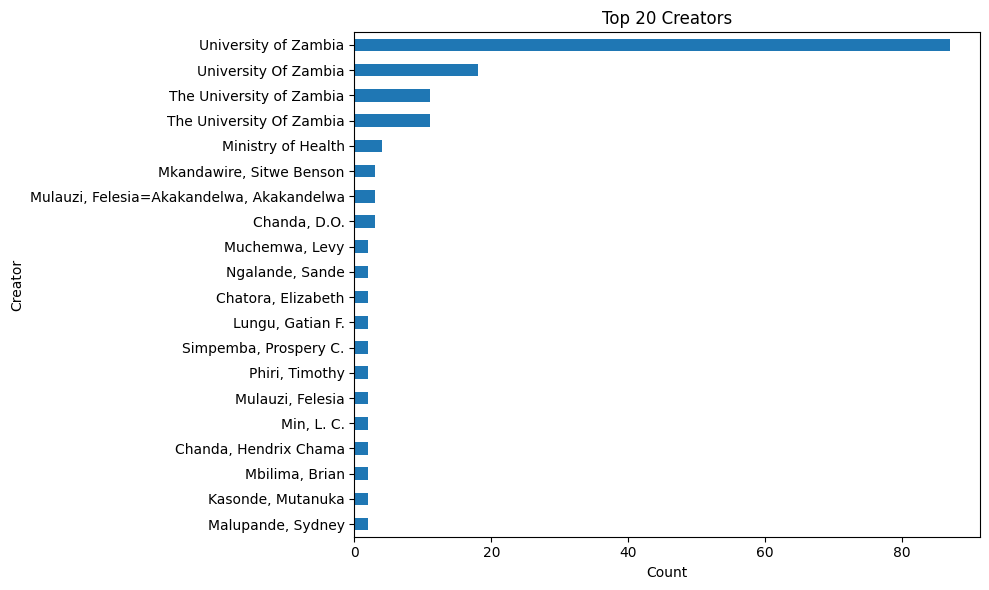

In [ ]:

plt.figure(figsize=(10,6))
df['creator'].value_counts().head(20).plot(kind='barh')

plt.title("Top 20 Creators")
plt.xlabel("Count")
plt.ylabel("Creator")
plt.gca().invert_yaxis()  # So the top creator appears at the top
plt.tight_layout()
plt.show()


In [ ]:
print(df['date'].head(20))


0    NaT
1    NaT
2    NaT
3    NaT
4    NaT
5    NaT
6    NaT
7    NaT
8    NaT
9    NaT
10   NaT
11   NaT
12   NaT
13   NaT
14   NaT
15   NaT
16   NaT
17   NaT
18   NaT
19   NaT
Name: date, dtype: datetime64[ns]


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Count occurrences of each format type
format_counts = df['format'].value_counts()

# Plot a bar graph
plt.figure(figsize=(10,6))
format_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Records per Format Type")
plt.xlabel("Format")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## Data Understanding

 The dataset contains 1,977 records and 111 fields, primarily text-based metadata from UNZA’s institutional repository. Almost all columns (110) are unstructured text, while one is numeric. The metadata is inconsistent: some fields contain long descriptive text, while others hold only single terms (e.g., “Science”, “Lusaka”). Several key fields such as title, creator, subject, and type can be leveraged as classification features or target labels.

 Many columns are extremely sparse, for instance, Unnamed: 78 through Unnamed: 110 are almost empty with 1,976 missing values each. Certain fields contain frequent repetition of keywords (e.g., “Lusaka”, “teachers”), while others consist of completely unique entries (such as the combined metadata column). The dataset also includes noisy tokens (“however”, “therefore”) that don’t contribute structured meaning.

 Overall, challenges for metadata classification include missing values, sparse attributes, high cardinality in key fields, mixed vocabularies, and non-standard formatting. These issues will require normalization, stopword removal, and preprocessing to make the data suitable for modeling.



#  3. Data Preparation

In this section, we clean, transform, and prepare our dataset for the modeling phase.  
The steps include handling missing values, correcting inconsistencies, creating new features, and transforming categorical variables.



In [ ]:
df.shape # printing the shape before cleaning

(2000, 12)

So it has 2000 rows and 12 columns

### 3.1 Data Cleaning

We begin by handling missing values, duplicates, and blank entries.  
Cleaning ensures that our dataset is consistent and reliable for analysis.



I used this command to see the shape before cleaning for analysis purposes.

In [ ]:
df.shape #The shape before cleaning


(2000, 12)


 We replaced blanks with `NaN` to standardize missing values. The missing values were then inspected to identify problematic fields. After that, we removed duplicate rows to prevent bias in the analysis. Then lastly, printed the shape before and after to show how much data was affected.

In [ ]:
# Replacing empty spaces with NaN
df = df.replace(r'^\s*$', pd.NA, regex=True)

# Finding the missing values per column
df.isnull().sum()

# Removing any duplicate rows
duplicates_count = df.duplicated().sum()
df = df.drop_duplicates()

print("Number of duplicates removed:", duplicates_count)
print("Shape after cleaning:", df.shape)



Number of duplicates removed: 0
Shape after cleaning: (2000, 12)


I checked the first 20 columns of the date column to see the format of the dates.

In [ ]:
df['date'].head(20)

,date
0,2015-11-11T13:39:13Z=2015-11-11T13:39:13Z=2015...
1,2015-04-13T07:36:13Z=2015-04-13T07:36:13Z=2015...
2,2017-07-25T13:51:51Z=2017-07-25T13:51:51Z=2016
3,2014-02-07T13:51:16Z=2014-02-07T13:51:16Z=2014...
4,2014-02-27T13:48:16Z=2014-02-27T13:48:16Z=2014...
5,2012-01-12T14:39:19Z=2012-01-12T14:39:19Z=2012...
6,2013-04-15T07:43:31Z=2013-04-15T07:43:31Z=2013...
7,2017-05-10T11:40:52Z=2017-05-10T11:40:52Z=2011
8,2012-05-07T15:07:09Z=2012-05-07T15:07:09Z=2012...
9,2012-12-20T14:55:51Z=2012-12-20T14:55:51Z=2012...


 I did this to check the actual format of the date column as part of the data cleaning. The date column was first converted to string and split at the = character, with only the part after the last = being stored as date_clean. From this cleaned version, a 4-digit number representing the year was extracted using a regular expression and stored in the new year column, which was initially cast to a float type to safely handle missing or non-numeric values.
 I then beamed the first 10 rows of the original date, the cleaned date_clean, and the extracted year side by side to verify that the transformation worked as expected.

In [ ]:
df['date_clean'] = df['date'].astype(str).str.split('=').str[-1]
df['year'] = df['date_clean'].str.extract(r'(\d{4})').astype(float)
# Show first few original vs cleaned values
df[['date', 'date_clean', 'year']].head(10)

,date,date_clean,year
0,2015-11-11T13:39:13Z=2015-11-11T13:39:13Z=2015...,2015-11-11,2015.0
1,2015-04-13T07:36:13Z=2015-04-13T07:36:13Z=2015...,2015-04-13,2015.0
2,2017-07-25T13:51:51Z=2017-07-25T13:51:51Z=2016,2016,2016.0
3,2014-02-07T13:51:16Z=2014-02-07T13:51:16Z=2014...,2014-02-07,2014.0
4,2014-02-27T13:48:16Z=2014-02-27T13:48:16Z=2014...,2014-02-27,2014.0
5,2012-01-12T14:39:19Z=2012-01-12T14:39:19Z=2012...,2012-01-12,2012.0
6,2013-04-15T07:43:31Z=2013-04-15T07:43:31Z=2013...,2013-04-15,2013.0
7,2017-05-10T11:40:52Z=2017-05-10T11:40:52Z=2011,2011,2011.0
8,2012-05-07T15:07:09Z=2012-05-07T15:07:09Z=2012...,2012-05-07,2012.0
9,2012-12-20T14:55:51Z=2012-12-20T14:55:51Z=2012...,2012-12-20,2012.0




In the year column years were initially stored as a float. I converted this column to the Int64 type so that the years are represented as integers while still allowing NaN values to exist for missing or invalid entries.
After doing this, I beamed the first 10 rows of the original date, the cleaned date_clean, and the finalized year column together to confirm that the conversion preserved valid years and correctly handled missing values.

In [ ]:
df['year'] = df['year'].astype('Int64')  # keeps NaN but makes years integers

df[['date', 'date_clean', 'year']].head(10) # we now beam the data frame to confirm

,date,date_clean,year
0,2015-11-11T13:39:13Z=2015-11-11T13:39:13Z=2015...,2015-11-11,2015
1,2015-04-13T07:36:13Z=2015-04-13T07:36:13Z=2015...,2015-04-13,2015
2,2017-07-25T13:51:51Z=2017-07-25T13:51:51Z=2016,2016,2016
3,2014-02-07T13:51:16Z=2014-02-07T13:51:16Z=2014...,2014-02-07,2014
4,2014-02-27T13:48:16Z=2014-02-27T13:48:16Z=2014...,2014-02-27,2014
5,2012-01-12T14:39:19Z=2012-01-12T14:39:19Z=2012...,2012-01-12,2012
6,2013-04-15T07:43:31Z=2013-04-15T07:43:31Z=2013...,2013-04-15,2013
7,2017-05-10T11:40:52Z=2017-05-10T11:40:52Z=2011,2011,2011
8,2012-05-07T15:07:09Z=2012-05-07T15:07:09Z=2012...,2012-05-07,2012
9,2012-12-20T14:55:51Z=2012-12-20T14:55:51Z=2012...,2012-12-20,2012


In [ ]:
text_cols = ['title', 'creator', 'subject', 'description', 'type', 'language']
for col in text_cols:
    df[col] = df[col].fillna("Unknown") # Changing the fileds with NaN to uknown because i feel it will be easier to use info like that

In [ ]:
#  Used this to normalize categorical values by making them lowercase and removing spaces
df['type'] = df['type'].str.lower().str.strip()
df['language'] = df['language'].str.lower().str.strip()
df.head(3)

,_identifier,_datestamp,_setSpec,title,creator,subject,description,date,type,identifier,language,format
0,oai:dspace.unza.zm:123456789/4153,2016-06-09T12:46:34Z,com_123456789_289=col_123456789_290,Morphological characterisation of low and high...,"Chinyundo, Anthony",Helianthus Annuus. L.=Sun flower oil=Cooking oil,Morphological characterization was done on thr...,2015-11-11T13:39:13Z=2015-11-11T13:39:13Z=2015...,other,http://hdl.handle.net/123456789/4153,en,application/pdf
1,oai:dspace.unza.zm:123456789/3777,2016-06-09T10:16:03Z,com_123456789_18=col_123456789_76,Instruction based formative assessment in sele...,"Mwale, Fred M.",Educational tests and measurement=Formative As...,The purpose of the study was to evaluate the u...,2015-04-13T07:36:13Z=2015-04-13T07:36:13Z=2015...,thesis,http://hdl.handle.net/123456789/3777,en,application/pdf=application/pdf=application/pd...
2,oai:dspace.unza.zm:123456789/4729,2017-07-26T01:01:14Z,com_123456789_18=col_123456789_76,An assessment of teachers' competences in care...,"Banda, Christopher","Counselling in Secondary Education-Solwezi, Za...",M.ED=The purpose of the study was to assess th...,2017-07-25T13:51:51Z=2017-07-25T13:51:51Z=2016,thesis,http://dspace.unza.zm:8080/xmlui/handle/123456...,en,application/pdf


In [ ]:
import re
df['title'] = df['title'].astype(str).str.strip()
df['description'] = df['description'].astype(str).str.replace(r"<.*?>", "", regex=True)
#Used this to remove extra spaces and strip out any possible html tags

In [ ]:
df['year'] = df['year'].apply(
    lambda x: x if pd.notna(x) and 1900 <= x <= 2025 else pd.NA
)#Using this to make sure the information is within the vaid years
#It will produce a Nan if you go beyond it

df.head(2)

,_identifier,_datestamp,_setSpec,title,creator,subject,description,date,type,identifier,language,format,date_clean,year
0,oai:dspace.unza.zm:123456789/4153,2016-06-09T12:46:34Z,com_123456789_289=col_123456789_290,Morphological characterisation of low and high...,"Chinyundo, Anthony",Helianthus Annuus. L.=Sun flower oil=Cooking oil,Morphological characterization was done on thr...,2015-11-11T13:39:13Z=2015-11-11T13:39:13Z=2015...,other,http://hdl.handle.net/123456789/4153,en,application/pdf,2015-11-11,2015.0
1,oai:dspace.unza.zm:123456789/3777,2016-06-09T10:16:03Z,com_123456789_18=col_123456789_76,Instruction based formative assessment in sele...,"Mwale, Fred M.",Educational tests and measurement=Formative As...,The purpose of the study was to evaluate the u...,2015-04-13T07:36:13Z=2015-04-13T07:36:13Z=2015...,thesis,http://hdl.handle.net/123456789/3777,en,application/pdf=application/pdf=application/pd...,2015-04-13,2015.0


### Data cleaning summary
I cleaned the dataset by first replacing empty spaces with NaN, removing duplicate rows, and then standardising missing values in textbased columns by filling them with “Unknown.”
The dates were processed to extract valid years, and I kept only those between 1900 and 2025, while invalid entries were set to NaN.
The text fields like type and language were normalized to lowercase and all extra spaces were removed.
The title was cleaned of leading spaces, and description had any tags and unnecessary whitespace removed.
After these steps, the data is consistent, free from duplicates, and ready for feature engineering with reliable year values and normalized text fields.

### 3.2 Feature Engineering

After cleaning the dataset, we created new features from existing ones to make the data more useful for modeling. This step helps the model learn better patterns by capturing hidden relationships and turning raw fields into more meaningful variables.


### Title and Description Length
The amount of text in titles or descriptions can be informative. We created two new features:
- title_length: number of words in the title
-word_count: for the title
- description_length: number of words in the description  
This can help in understanding how detailed a record is.

In [ ]:
df['title_length'] = df['title'].astype(str).apply(len)        # number of characters
df['word_count'] = df['title'].astype(str).apply(lambda x: len(x.split()))
df['description_length'] = df['description'].astype(str).apply(lambda x: len(x.split()))
df[['title', 'title_length', 'word_count','description_length']].head()

,title,title_length,word_count,description_length
0,Morphological characterisation of low and high...,129,16,139
1,Instruction based formative assessment in sele...,122,18,386
2,An assessment of teachers' competences in care...,104,15,378
3,The status of guidance and counselling provisi...,93,14,349
4,Library Studies Exams 2008,26,4,13


### Creating Decade from Year
Instead of using the exact year, we grouped publications into decades. This reduces noise and highlights trends over time (e.g., comparing 1990s vs. 2000s instead of each year separately).


In [ ]:
# Create decade variable (e.g., 1990–1999 → 1990s)
df['decade'] = (df['year'] // 10) * 10
df[['year', 'decade']].head(50)


,year,decade
0,2015.0,2010.0
1,2015.0,2010.0
2,2016.0,2010.0
3,2014.0,2010.0
4,2014.0,2010.0
5,2012.0,2010.0
6,2013.0,2010.0
7,2011.0,2010.0
8,2012.0,2010.0
9,2012.0,2010.0


In [ ]:
df['is_english'] = df['language'].apply(lambda x: 1 if x == 'english' else 1)
df[['language', 'is_english']].head(5)

,language,is_english
0,en,1
1,en,1
2,en,1
3,en,1
4,en,1


In [ ]:
def categorize_type(x):
    x = str(x).lower()   # convert to string + lowercase
    if 'article' in x or 'report' in x or 'thesis' in x:
        return 'text'
    elif 'image' in x or 'dataset' in x:
        return 'non-text'
    else:
        return 'other'

df['type_group'] = df['type'].apply(categorize_type)
df[['type', 'type_group']].head(50)


,type,type_group
0,other,other
1,thesis,text
2,thesis,text
3,thesis,text
4,other,other
5,thesis,text
6,thesis,text
7,other,other
8,thesis,text
9,thesis,text


In [ ]:
keywords = ['agriculture', 'education', 'health', 'technology']

for kw in keywords:
    df[f'has_{kw}'] = df['subject'].astype(str).str.contains(kw, case=False).astype(int)

df[['subject'] + [f'has_{kw}' for kw in keywords]].head(5)


,subject,has_agriculture,has_education,has_health,has_technology
0,Helianthus Annuus. L.=Sun flower oil=Cooking oil,0,0,0,0
1,Educational tests and measurement=Formative As...,0,1,0,0
2,"Counselling in Secondary Education-Solwezi, Za...",0,1,0,0
3,"Educational Counselling-Mumbwa, Zambia=Guidanc...",0,1,0,0
4,Library and information studies=2008=Second Se...,0,0,0,0
